<a href="https://colab.research.google.com/github/Victor11072/ecommerce-data-joins-analysis/blob/main/Beginner_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Beginner Project 3/ECommerce order/Ecommerce Order Dataset/test/df_Customers.csv')
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Beginner Project 3/ECommerce order/Ecommerce Order Dataset/test/df_Orders.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Beginner Project 3/ECommerce order/Ecommerce Order Dataset/test/df_OrderItems.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Beginner Project 3/ECommerce order/Ecommerce Order Dataset/test/df_Products.csv')
payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Beginner Project 3/ECommerce order/Ecommerce Order Dataset/test/df_Payments.csv')

In [3]:
#Inspect the each dataset for missing values and anomalies

print(customers.head())
print(orders.head())
print(order_items.head())
print(products.head())
print(payments.head())

    customer_id  customer_zip_code_prefix        customer_city customer_state
0  I74lXDOfoqsp                      6020              goiania             GO
1  47TuLHF2s7X5                     23020               viamao             RS
2  dQ0dqI8Qwlj8                     75094             campinas             SP
3  iQCmWhNkIczb                     89284  santana de parnaiba             SP
4  Dp2g6JH8tO5Z                     39810             aripuana             MT
       order_id   customer_id order_purchase_timestamp    order_approved_at
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57  2017-11-18 12:46:08
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12  2018-06-02 20:12:23
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30  2018-01-09 07:24:03
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46  2017-03-10 10:24:46
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07  2017-12-05 04:13:30
       order_id    product_id     seller_id    price  shipping_charges
0  u6

In [4]:
print("Customer", customers.isna().sum())
print("Orders",orders.isna().sum())
print("Orders_item",order_items.isna().sum())
print("Products",products.isna().sum())
print("Payments",payments.isna().sum())

Customer customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Orders order_id                    0
customer_id                 0
order_purchase_timestamp    0
order_approved_at           7
dtype: int64
Orders_item order_id            0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64
Products product_id                 0
product_category_name    168
product_weight_g          10
product_length_cm         10
product_height_cm         10
product_width_cm          10
dtype: int64
Payments order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [5]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             38279 non-null  object 
 1   product_category_name  38111 non-null  object 
 2   product_weight_g       38269 non-null  float64
 3   product_length_cm      38269 non-null  float64
 4   product_height_cm      38269 non-null  float64
 5   product_width_cm       38269 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.8+ MB
None


In [6]:
products_new = products.dropna()
orders_new = orders.dropna()
print(products_new.isna().sum())
print(orders_new.isna().sum())

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64
order_id                    0
customer_id                 0
order_purchase_timestamp    0
order_approved_at           0
dtype: int64


In [7]:
#Join customers df with orders df on customer_id saved as customer_order
customers_orders = customers.merge(orders_new, on="customer_id")
print(customers_orders.head())

#Joined orders with product df on oerder_id saved as orders_orders_item
orders_order_items = orders_new.merge(order_items, on="order_id")
print(orders_order_items.head())

#Joined  order_item df with product df on product_id saved order_item_product
order_items_products = order_items.merge(products_new, on="product_id")
print(order_items_products.head())

#Joined order_payment df with orders df saved as orders_payment
orders_payments = orders_new.merge(payments, on="order_id")
print(orders_payments.head())

    customer_id  customer_zip_code_prefix        customer_city customer_state  \
0  I74lXDOfoqsp                      6020              goiania             GO   
1  47TuLHF2s7X5                     23020               viamao             RS   
2  dQ0dqI8Qwlj8                     75094             campinas             SP   
3  iQCmWhNkIczb                     89284  santana de parnaiba             SP   
4  Dp2g6JH8tO5Z                     39810             aripuana             MT   

       order_id order_purchase_timestamp    order_approved_at  
0  u6rPMRAYIGig      2017-11-18 12:29:57  2017-11-18 12:46:08  
1  ohY8f4FEbX19      2018-06-02 17:13:12  2018-06-02 20:12:23  
2  I28liQek73i2      2018-01-08 11:01:30  2018-01-09 07:24:03  
3  bBG1T89mlY8W      2017-03-10 10:24:46  2017-03-10 10:24:46  
4  CYxJJSQS8Lbo      2017-12-02 10:04:07  2017-12-05 04:13:30  
       order_id   customer_id order_purchase_timestamp    order_approved_at  \
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:2

In [8]:
print(customers_orders.columns, customers_orders.shape)
print(orders_order_items.columns, orders_order_items.shape)
print(order_items_products.columns, order_items_products.shape)
print(orders_payments.columns, orders_payments.shape)

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_purchase_timestamp',
       'order_approved_at'],
      dtype='object') (38272, 7)
Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'product_id', 'seller_id', 'price',
       'shipping_charges'],
      dtype='object') (38272, 8)
Index(['order_id', 'product_id', 'seller_id', 'price', 'shipping_charges',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object') (482493, 10)
Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') (38272, 8)


In [10]:
#Joined customers_orders with orders_order_items on 4 different columns saved as merge_1
merge_1 = customers_orders.merge(orders_order_items, on=["order_id", 'customer_id', 'order_purchase_timestamp', 'order_approved_at'])
print(merge_1.head())

print(merge_1.columns, order_items_products.columns)

#Joined merge_1 with orders_items_products on 5 different columns saved as merge_2
merge_2 = merge_1.merge(order_items_products, on=["order_id", 'product_id', 'seller_id', 'price', 'shipping_charges'])
print(merge_2.head())

    customer_id  customer_zip_code_prefix        customer_city customer_state  \
0  I74lXDOfoqsp                      6020              goiania             GO   
1  47TuLHF2s7X5                     23020               viamao             RS   
2  dQ0dqI8Qwlj8                     75094             campinas             SP   
3  iQCmWhNkIczb                     89284  santana de parnaiba             SP   
4  Dp2g6JH8tO5Z                     39810             aripuana             MT   

       order_id order_purchase_timestamp    order_approved_at    product_id  \
0  u6rPMRAYIGig      2017-11-18 12:29:57  2017-11-18 12:46:08  1slxdgbgWFax   
1  ohY8f4FEbX19      2018-06-02 17:13:12  2018-06-02 20:12:23  77PgsiElQLeB   
2  I28liQek73i2      2018-01-08 11:01:30  2018-01-09 07:24:03  QVlD26X1y7NI   
3  bBG1T89mlY8W      2017-03-10 10:24:46  2017-03-10 10:24:46  yWlFGkKYfrpa   
4  CYxJJSQS8Lbo      2017-12-02 10:04:07  2017-12-05 04:13:30  h6MCbrwh5kiC   

      seller_id    price  shipping_cha

In [11]:
print(merge_2.columns, orders_payments.columns)

#Finally joined merge_2 with oorders_payment on 4 different column saved as supply chain
supply_chain = merge_2.merge(orders_payments, on=["order_id", 'customer_id', 'order_purchase_timestamp', 'order_approved_at'])
print(supply_chain.head(), supply_chain.shape)

Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_purchase_timestamp',
       'order_approved_at', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object') Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
    customer_id  customer_zip_code_prefix customer_city customer_state  \
0  I74lXDOfoqsp                      6020       goiania             GO   
1  I74lXDOfoqsp                      6020       goiania             GO   
2  I74lXDOfoqsp                      6020       goiania             GO   
3  47TuLHF2s7X5                     23020        viamao             RS   
4  47TuLHF2s7X5                     23020        viamao             RS 

In [12]:
#Checked for missing value in the final supply chain df
print(supply_chain.isna().sum())

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_purchase_timestamp    0
order_approved_at           0
product_id                  0
seller_id                   0
price                       0
shipping_charges            0
product_category_name       0
product_weight_g            0
product_length_cm           0
product_height_cm           0
product_width_cm            0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
dtype: int64


In [28]:
#Clean supply chain by dropping duplicate value on order id
supply_chain_cleaned = supply_chain.drop_duplicates(subset='order_id')
print(supply_chain_cleaned.shape, supply_chain_cleaned.columns)

(38094, 20) Index(['customer_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_purchase_timestamp',
       'order_approved_at', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value'],
      dtype='object')


In [14]:
#sales per customer
sales_per_customer = supply_chain_cleaned.groupby('customer_id').agg({'price':'sum'}).sort_values('price', ascending=False)
print(sales_per_customer.head())
print(sales_per_customer.tail())

               price
customer_id         
klIZ7q6nbRlL  6729.0
CIilaTCpyvq9  6499.0
CwY8Xp9Wlk21  6499.0
pm7wImzbUg6e  6499.0
ufiIX2B5hPwm  4799.0
              price
customer_id        
NN1wtuZk71Y4   0.85
iYJoHRgEBcdK   0.85
24z0a52fu4fO   0.85
28BlOMqunV8T   0.85
dpokTPvHOpeZ   0.85


In [15]:
#Highest customer Details
highest_cust_sales = supply_chain_cleaned[supply_chain_cleaned['customer_id'] == 'klIZ7q6nbRlL'][['price', 'product_category_name', 'customer_city',
                                                                                                  'customer_state', 'order_purchase_timestamp', 'shipping_charges']]
print(highest_cust_sales)

         price product_category_name   customer_city customer_state  \
291602  6729.0                  toys  campina grande             PB   

       order_purchase_timestamp  shipping_charges  
291602      2018-07-30 19:38:03             38.93  


In [16]:
#Quantity per customer
quantity_per_customer = supply_chain_cleaned.groupby('customer_id').agg({'order_id':'count'}).sort_values('order_id', ascending=False)
print(quantity_per_customer.head())
print(quantity_per_customer.tail())

              order_id
customer_id           
zzfOdaQNCyz5         1
0027MnmEcEx0         1
006Qnh6UbZWp         1
00DP5EaE4Ro1         1
00IHcNfTDJjS         1
              order_id
customer_id           
01tZYuVHw6IY         1
01tQ4KSerDsz         1
01p724aqrjih         1
01jIO78l2WC7         1
01gdKwuHDWX7         1


In [17]:
#Sales per product
sales_per_product = supply_chain_cleaned.groupby('product_category_name').agg({'price':'sum'}).sort_values('price', ascending=False)
print(sales_per_product.head())
print(sales_per_product.tail())

                            price
product_category_name            
toys                   9778707.33
garden_tools            413352.47
furniture_decor         340690.34
bed_bath_table          252137.43
health_beauty           245269.32
                                   price
product_category_name                   
fashion_sport                      95.03
la_cuisine                         91.33
furniture_mattress_and_upholstery  76.99
arts_and_craftmanship              37.49
music                              23.10


In [18]:
#Quantity per product
quantity_per_product = supply_chain_cleaned.groupby('product_category_name').agg({'order_id':'count'}).sort_values('order_id', ascending=False)
print(quantity_per_product.head())
print(quantity_per_product.tail())

                       order_id
product_category_name          
toys                      28683
health_beauty              1038
bed_bath_table              948
sports_leisure              804
computers_accessories       746
                                   order_id
product_category_name                      
arts_and_craftmanship                     1
fashion_sport                             1
furniture_mattress_and_upholstery         1
la_cuisine                                1
music                                     1


In [19]:
#sale per city
sales_per_city = supply_chain_cleaned.groupby('customer_city').agg({'price':'sum'}).sort_values('price', ascending=False)
print(sales_per_city.head())
print(sales_per_city.tail())

                     price
customer_city             
sao paulo       1996562.09
rio de janeiro   902576.94
belo horizonte   378861.15
brasilia         286272.64
porto alegre     226204.13
                           price
customer_city                   
nova lacerda                7.29
itaueira                    5.20
santo antonio das missoes   4.35
apore                       4.20
unistalda                   3.50


In [20]:
#quantity per city
quantity_per_city = supply_chain_cleaned.groupby('customer_city').agg({'order_id':'count'}).sort_values('order_id', ascending=False)
print(quantity_per_city.head())
print(quantity_per_city.tail())

                order_id
customer_city           
sao paulo           6127
rio de janeiro      2713
belo horizonte      1082
brasilia             836
porto alegre         570
               order_id
customer_city          
acegua                1
acari                 1
abre campo            1
abdon batista         1
abaira                1


In [21]:
#sale per state
sales_per_state = supply_chain_cleaned.groupby('customer_state').agg({'price':'sum'}).sort_values('price', ascending=False)
print(sales_per_state.head())
print(sales_per_state.tail())

                     price
customer_state            
SP              5408637.08
RJ              1650987.50
MG              1503672.16
RS               820742.71
PR               706794.49
                   price
customer_state          
RO              27223.29
AM              14291.14
AC               8394.45
AP               7053.34
RR               2828.91


In [26]:
#quantity per state
quantity_per_state = supply_chain_cleaned.groupby('customer_state').agg({'order_id':'count'}).sort_values('order_id', ascending=False)
print(quantity_per_state.head())
print(quantity_per_state.tail())

                order_id
customer_state          
SP                 16112
RJ                  5047
MG                  4367
RS                  2165
PR                  1896
                order_id
customer_state          
RO                    94
AM                    52
AC                    29
AP                    20
RR                    12


In [23]:
print(supply_chain_cleaned['order_purchase_timestamp'].head())

0     2017-11-18 12:29:57
3     2018-06-02 17:13:12
5     2018-01-08 11:01:30
8     2017-03-10 10:24:46
14    2017-12-02 10:04:07
Name: order_purchase_timestamp, dtype: object


In [32]:
#Extract year and month column from order_purchased_timestamp from the supply chain df i generated
supply_chain_cleaned['year'] = pd.DatetimeIndex(supply_chain_cleaned['order_purchase_timestamp']).year
supply_chain_cleaned['month'] = pd.DatetimeIndex(supply_chain_cleaned['order_purchase_timestamp']).month

print(supply_chain_cleaned[['year', 'month']].head())

print(supply_chain_cleaned['year'].unique())
print(supply_chain_cleaned['month'].unique())

    year  month
0   2017     11
3   2018      6
5   2018      1
8   2017      3
14  2017     12
[2017 2018 2016]
[11  6  1  3 12  7  2  5  4  8 10  9]


<ipython-input-32-18ceb576c1fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_cleaned['year'] = pd.DatetimeIndex(supply_chain_cleaned['order_purchase_timestamp']).year
<ipython-input-32-18ceb576c1fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_cleaned['month'] = pd.DatetimeIndex(supply_chain_cleaned['order_purchase_timestamp']).month


      payment_value
year               
2016       33585.58
2017     4716560.94
2018     5441465.28


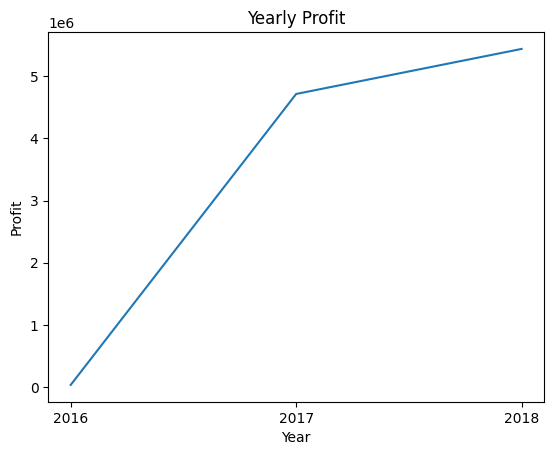

In [59]:
#Plot the yearly profit
yearly_profit = supply_chain_cleaned.groupby('year').agg({'payment_value':'sum'}).sort_values('year', ascending=True)
print(yearly_profit)

plt.plot(yearly_profit.index, yearly_profit['payment_value'])
plt.xlabel('Year')
plt.xticks(yearly_profit.index)
plt.ylabel('Profit')
plt.title('Yearly Profit')
plt.show()

       payment_value
month               
10          33233.89
12            351.69


AttributeError: 'DataFrame' object has no attribute 'imdex'

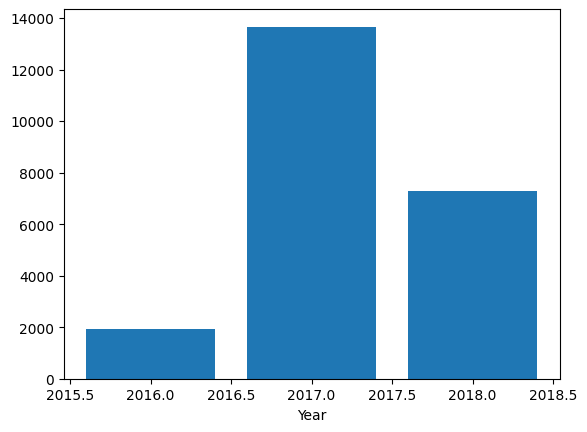

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#Extract each year data of the supply chain df
supply_chain_cleaned_2016 = supply_chain_cleaned[supply_chain_cleaned['year'] == 2016]
supply_chain_cleaned_2017 = supply_chain_cleaned[supply_chain_cleaned['year'] == 2017]
supply_chain_cleaned_2018 = supply_chain_cleaned[supply_chain_cleaned['year'] == 2018]

#print(supply_chain_cleaned_2016.head())
#print(supply_chain_cleaned_2017.head())
#print(supply_chain_cleaned_2018.head())

<ipython-input-60-9122ee5d91b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_cleaned_2016['month_name'] = supply_chain_cleaned_2016['month'].apply(lambda x: calendar.month_name[x])


                  payment_value
month month_name               
10    October          33233.89
12    December           351.69
      month_name  payment_value
month                          
10       October       33233.89
12      December         351.69


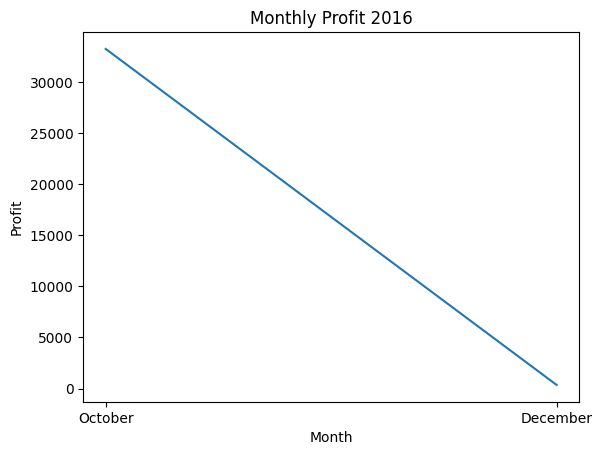

In [60]:
import calendar

#Covert the numeric value of the the month to month name using calender library
supply_chain_cleaned_2016['month_name'] = supply_chain_cleaned_2016['month'].apply(lambda x: calendar.month_name[x])

monthly_profit_2016 = supply_chain_cleaned_2016.groupby(['month', 'month_name']).agg({'payment_value':'sum'}).sort_values('month', ascending=True)
print(monthly_profit_2016)
monthly_profit_2016 = monthly_profit_2016.reset_index(level = 'month_name')
print(monthly_profit_2016)

#Plot 2016 mothly profit
plt.plot(monthly_profit_2016['month_name'], monthly_profit_2016['payment_value'])
plt.xlabel('Month')
plt.xticks(monthly_profit_2016['month_name'])
plt.ylabel('Profit')
plt.title('Monthly Profit 2016')
plt.show()

                  payment_value
month month_name               
1     January          92211.61
2     February        158164.08
3     March           269469.05
4     April           254832.31
5     May             369334.37
6     June            325683.60
7     July            428901.47
8     August          490528.05
9     September       467496.18
10    October         480877.86
11    November        833349.29
12    December        545713.07


<ipython-input-61-0bac490ba91b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_cleaned_2017['month_name'] = supply_chain_cleaned_2017['month'].apply(lambda x: calendar.month_name[x])


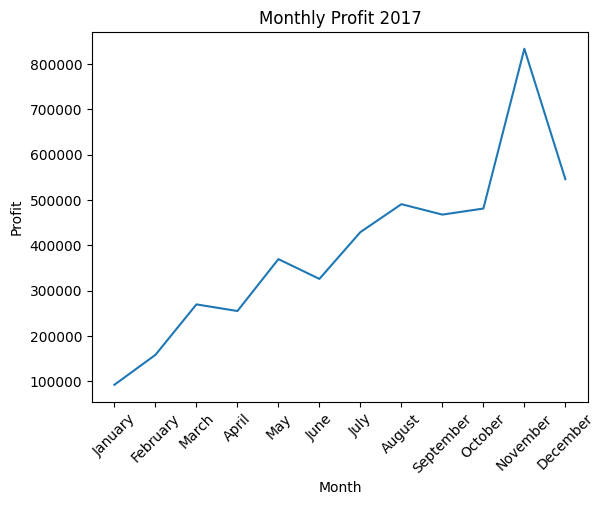

In [61]:
supply_chain_cleaned_2017['month_name'] = supply_chain_cleaned_2017['month'].apply(lambda x: calendar.month_name[x])

monthly_profit_2017 = supply_chain_cleaned_2017.groupby(['month', 'month_name']).agg({'payment_value':'sum'}).sort_values('month', ascending=True)
print(monthly_profit_2017)
monthly_profit_2017 = monthly_profit_2017.reset_index(level = 'month_name')


#Plot 2017 mothly profit
plot3 = plt.plot(monthly_profit_2017['month_name'], monthly_profit_2017['payment_value'])
plt.xlabel('Month')
plt.xticks(monthly_profit_2017['month_name'], rotation=45)
plt.ylabel('Profit')
plt.title('Monthly Profit 2017')
plt.show()

<ipython-input-62-e6ed2251557b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supply_chain_cleaned_2018['month_name'] = supply_chain_cleaned_2018['month'].apply(lambda x: calendar.month_name[x])


                  payment_value
month month_name               
1     January         755345.56
2     February        748681.09
3     March           695234.68
4     April           714435.18
5     May             709560.62
6     June            649181.19
7     July            577945.11
8     August          591016.09
9     September           65.76


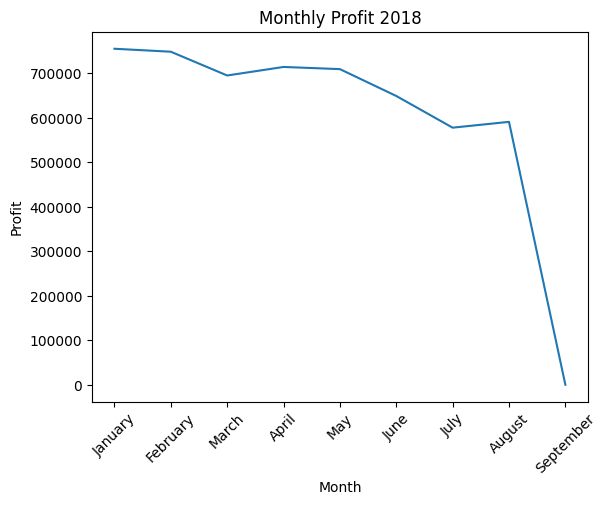

In [62]:
supply_chain_cleaned_2018['month_name'] = supply_chain_cleaned_2018['month'].apply(lambda x: calendar.month_name[x])

monthly_profit_2018 = supply_chain_cleaned_2018.groupby(['month', 'month_name']).agg({'payment_value':'sum'}).sort_values('month', ascending=True)
print(monthly_profit_2018)
monthly_profit_2018 = monthly_profit_2018.reset_index(level = 'month_name')


#Plot 2018 mothly profit
plot4 = plt.plot(monthly_profit_2018['month_name'], monthly_profit_2018['payment_value'])
plt.xlabel('Month')
plt.xticks(monthly_profit_2018['month_name'], rotation=45)
plt.ylabel('Profit')
plt.title('Monthly Profit 2018')
plt.show()

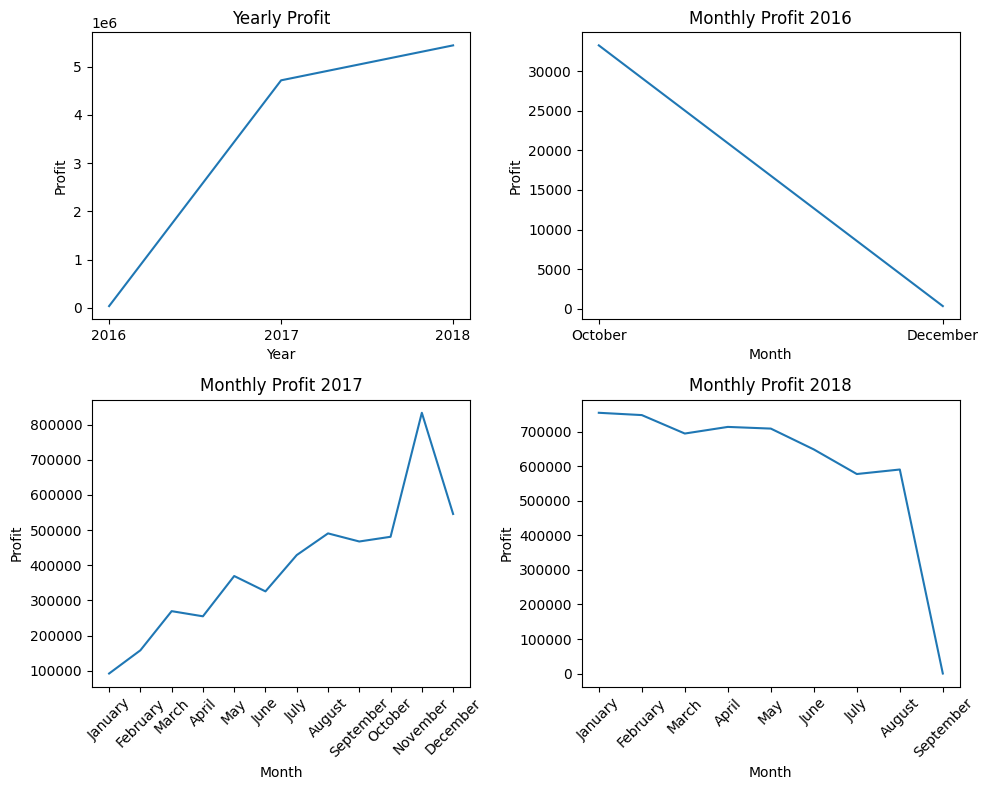

In [70]:
#Arranged my plot in a grid format for easy comparison of trends from each plot
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Top-left plot
axs[0, 0].plot(yearly_profit.index, yearly_profit['payment_value'])
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_xticks(yearly_profit.index)
axs[0, 0].set_ylabel('Profit')
axs[0, 0].set_title('Yearly Profit')


# Top-right plot
axs[0, 1].plot(monthly_profit_2016['month_name'], monthly_profit_2016['payment_value'])
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_xticks(monthly_profit_2016['month_name'])
axs[0, 1].set_ylabel('Profit')
axs[0, 1].set_title('Monthly Profit 2016')


# Bottom-left plot
axs[1, 0].plot(monthly_profit_2017['month_name'], monthly_profit_2017['payment_value'])
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_xticks(monthly_profit_2017['month_name'])
axs[1, 0].tick_params(axis = 'x', rotation = 45)
axs[1, 0].set_ylabel('Profit')
axs[1, 0].set_title('Monthly Profit 2017')

# Bottom-right plot
axs[1, 1].plot(monthly_profit_2018['month_name'], monthly_profit_2018['payment_value'])
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_xticks(monthly_profit_2018['month_name'])
axs[1, 1].tick_params(axis = 'x', rotation = 45)
axs[1, 1].set_ylabel('Profit')
axs[1, 1].set_title('Monthly Profit 2018')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()